In [5]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_26531_U')

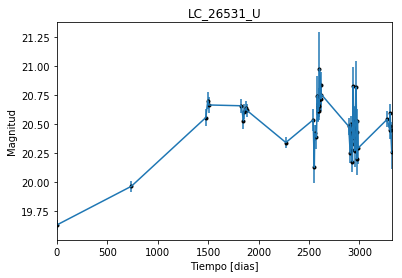

In [6]:
data = np.genfromtxt('LC_26531_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_26531_U')

In [7]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [8]:
%%capture capt
sample = model.run_mcmc(20000)

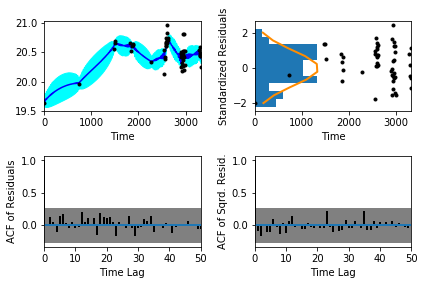

In [9]:
sample.assess_fit()

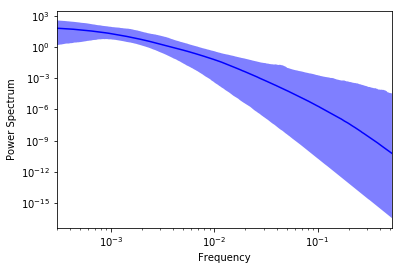

In [10]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [11]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_26531_U')

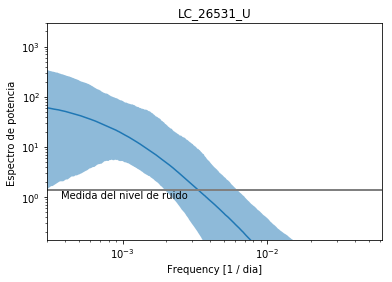

In [12]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_26531_U')

Text(0.5,1,'Prediccion , valor esperado LC_26531_U')

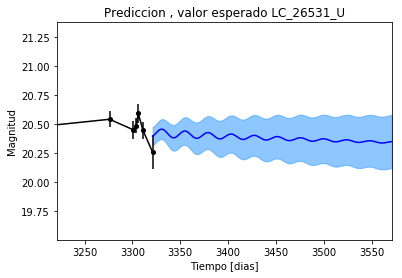

In [13]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_26531_U')

Text(0.5,1,'LC_26531_U')

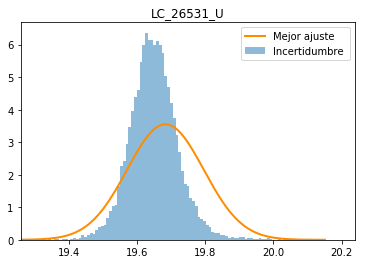

In [15]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_26531_U')

Text(0.5,1,'Interpolacion, camino simulado LC_26531_U')

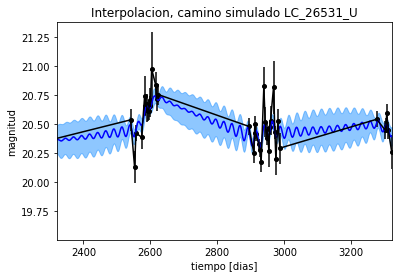

In [16]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_26531_U')

Text(0.5,1,'Interpolacion, camino simulado LC_26531_U')

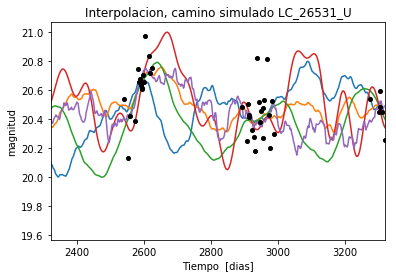

In [17]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_26531_U')

In [18]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [19]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1011.04451274
Median: 0.0184819113074
Standard deviation: 0.217792542873
68% credibility interval: [ 0.00118158  0.2441159 ]
95% credibility interval: [  3.71842171e-04   8.40394870e-01]
99% credibility interval: [  3.17826631e-04   1.01743499e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 926.694647021
Median: 0.00283969973298
Standard deviation: 0.0838254007665
68% credibility interval: [ 0.0004824   0.03289775]
95% credibility interval: [ 0.00032061  0.24566328]
99% credibility interval: [  3.05198373e-04   6.45382790e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 290.678523722
Median: 0.0290785836835
Standard 

In [20]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 991.956294004
Median: 47.6509628082
Standard deviation: 1.76823541585
68% credibility interval: [ 45.73608024  49.13020639]
95% credibility interval: [ 43.21948014  50.03065539]
99% credibility interval: [ 41.32380426  50.60236362]


In [21]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 631.350280467
Median: 0.889033411158
Standard deviation: 2.36675591892
68% credibility interval: [ 0.08911617  4.17933635]
95% credibility interval: [ 0.01909792  8.10759445]
99% credibility interval: [  0.01201873  11.31854114]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 564.259773132
Median: 0.404917155366
Standard deviation: 9.56001934445
68% credibility interval: [ 0.01574772  7.51442525]
95% credibility interval: [  8.49167609e

In [22]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 10009.548152
Median: 2.4021441324e-24
Standard deviation: 2.3085338814e+108
68% credibility interval: [  3.98529062e-72   1.83352684e+00]
95% credibility interval: [  4.00070170e-107   2.17546355e+082]
99% credibility interval: [  3.89963375e-136   9.14585669e+093]


In [23]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1963.73216069
Median: 20.304239796
Standard deviation: 0.196066985316
68% credibility interval: [ 20.1153056   20.46786554]
95% credibility interval: [ 19.87886526  20.63837467]
99% credibility interval: [ 19.66947861  20.82395307]


In [24]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 164.884728863
Median: 0.00276981774978
Standard deviation: 0.228040531775
68% credibility interval: [ 0.          0.27150755]
95% credibility interval: [ 0.          0.85227099]
99% credibility interval: [ 0.          1.01041852]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 164.884728863
Median: 0.00276981774978
Standard deviation: 0.228040531775
68% credibility interval: [ 0.          0.27150755]
95% credibility interval: [ 0.          0.85227099]
99% credibility interval: [ 0.          1.01041852]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 743.860235808
Median: 0.0
Standard deviation: 0.000510499279844
68% 

In [25]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 991.956294004
Median: 47.6509628082
Standard deviation: 1.76823541585
68% credibility interval: [ 45.73608024  49.13020639]
95% credibility interval: [ 43.21948014  50.03065539]
99% credibility interval: [ 41.32380426  50.60236362]


In [26]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1459.99240476
Median: 0.137204701167
Standard deviation: 0.16139582946
68% credibility interval: [ 0.08381294  0.24655675]
95% credibility interval: [ 0.05472997  0.559017  ]
99% credibility interval: [ 0.0437518   1.02858058]


In [27]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1160.60379054
Median: 1.1442680794
Standard deviation: 0.194346573785
68% credibility interval: [ 0.97220835  1.35367691]
95% credibility interval: [ 0.83320969  1.59997054]
99% credibility interval: [ 0.77240806  1.75774894]


In [28]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 564.476780171
Median: 0.000328957330015
Standard deviation: 0.378514136844
68% credibility interval: [  3.54570223e-07   1.77726054e-02]
95% credibility interval: [  1.71460159e-85   4.32963673e-01]
99% credibility interval: [  1.25103105e-97   3.28134709e+00]


In [29]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1011.04451274
Median: (-0.116125273575-0.289795310868j)
Standard deviation: 1.98130737844
68% credibility interval: [-1.53382544+0.j         -0.00742411-0.94641346j]
95% credibility interval: [ -5.28035670e+00+0.j          -2.33635327e-03-0.00216429j]
99% credibility interval: [ -6.39273255e+00+0.j          -1.99696362e-03-0.00418586j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 926.694647021
Median: (-0.0178423596391+0.251378374219j)
Standard deviation: 1.52655779311
68% credibility interval: [-0.20670268+0.j         -0.00303099+1.31142283j]
95% credibility interval: [-1.54354790+0.j -0.00201447+0.j]
99% credibility interval: [ -4.05505967e+00+1.44716228j  -1.91761793e-03+0.01610183j]
Posterior summary for paramet